# Info
Purpose:

    Describe the details ...

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2021-08-27
    Modified:


# Prepare python environment

In [3]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os


In [5]:
name = 'ARCTAS'
vv = 'v1'
fp = getpath(name)


Return path named:  ARCTAS /data/sam/arctas/


# Load files

In [11]:
dat,dat_d = lu.load_netcdf('/data/sunsat/ARCTAS_2008/data_archival/ARCTAS_AATS14_2008_R2.nc',everything=True)

Reading file: /data/sunsat/ARCTAS_2008/data_archival/ARCTAS_AATS14_2008_R2.nc
Outputting the Data subdatasets:
0: base_time
1: time_offset
2: time
3: wavelength
4: Latitude
5: Longitude
6: GPS_Alt
7: qual_flag
8: land_ocean
9: altitude_flag
10: AOD
11: UNC
12: polynomial
13: cWV1
14: std_cWV1
15: cO3
16: resid_cO3
[b'base_time', b'time_offset', b'time', b'wavelength', b'Latitude', b'Longitude', b'GPS_Alt', b'qual_flag', b'land_ocean', b'altitude_flag', b'AOD', b'UNC', b'polynomial', b'cWV1', b'std_cWV1', b'cO3', b'resid_cO3']


In [13]:
dat.keys()

dict_keys([b'base_time', b'time_offset', b'time', b'wavelength', b'Latitude', b'Longitude', b'GPS_Alt', b'qual_flag', b'land_ocean', b'altitude_flag', b'AOD', b'UNC', b'polynomial', b'cWV1', b'std_cWV1', b'cO3', b'resid_cO3'])

In [14]:
dat[b'wavelength']

masked_array(data=[ 354.,  380.,  453.,  499.,  519.,  606.,  675.,  779.,
                    865., 1019., 1241., 1559., 2139.],
             mask=False,
       fill_value=1e+20)

In [15]:
dat[b'AOD'].shape

(81958, 13)

In [17]:
dat[b'AOD'][dat[b'AOD']<=-10] = np.nan

In [26]:
dat_d[b'time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2008-03-25 00:00:00 0:00
unlimited dimensions: time
current shape = (81958,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [24]:
dat[b'time']

masked_array(data=[  60143.99999785,   60147.99999642,   60152.00000477,
                   ..., 9475188.00000143, 9475191.99999976,
                   9475195.99999833],
             mask=False,
       fill_value=1e+20)

# Plot out data

<IPython.core.display.Javascript object>


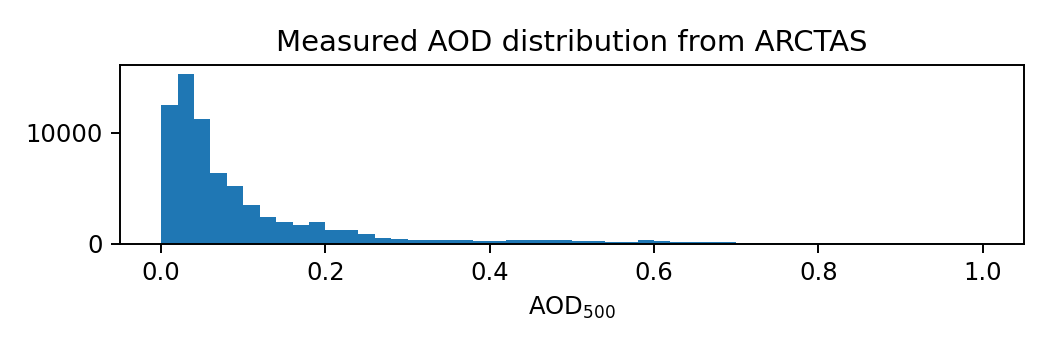

In [32]:
plt.figure(figsize=(6,2))

plt.hist(dat[b'AOD'][:,3],bins=50,range=[0,1])
plt.xlabel('AOD$_{{500}}$')
plt.title('Measured AOD distribution from ARCTAS')
plt.tight_layout()
